### Imports

In [237]:
import os

import pandas as pd
import numpy as np
import wandb

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans

import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV 

from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline

from sklearn import metrics
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")

survey = pd.read_csv("kaggle_survey_2021_responses.csv")
survey.head(5)

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


### Remove question descriptions row

In [186]:
survey = survey.iloc[1:, :]
survey.head(5)

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
5,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Select specific features

In [187]:
# df = pd.DataFrame(columns=['Gender', 'Country', 'Years Coding', 'Programming Languages Used', 'Python', 'R', 'SQL', 'C', 'C++', 'Java', 'Javascript', 'Julia', 'Swift', 'Bash', 'MATLAB', 'No Language', 'Other Language', 'Years Using ML', 'Income'])
df = pd.DataFrame(columns=['Gender', 'Country', 'Years Coding', 'Years Using ML', 'Income'])
df['Gender'] = survey['Q2']
df['Country'] = survey['Q3']
df['Years Coding'] = survey['Q6']
# df['Programming Languages Used'] = survey[survey.columns[7:21]].apply(lambda x: ', '.join(x.dropna().astype(str)), axis=1)
# df['Python'] = survey['Q7_Part_1']
# df['R'] = survey['Q7_Part_2']
# df['SQL'] = survey['Q7_Part_3']
# df['C'] = survey['Q7_Part_4']
# df['C++'] = survey['Q7_Part_5']
# df['Java'] = survey['Q7_Part_6']
# df['Javascript'] = survey['Q7_Part_7']
# df['Julia'] = survey['Q7_Part_8']
# df['Swift'] = survey['Q7_Part_9']
# df['Bash'] = survey['Q7_Part_10']
# df['MATLAB'] = survey['Q7_Part_11']
# df['No Language'] = survey['Q7_Part_12']
# df['Other Language'] = survey['Q7_OTHER']
df['Years Using ML'] = survey['Q15']
df['Income'] = survey['Q25']
df

,Gender,Country,Years Coding,Years Using ML,Income
1,Man,India,5-10 years,5-10 years,"25,000-29,999"
2,Man,Indonesia,20+ years,Under 1 year,"60,000-69,999"
3,Man,Pakistan,1-3 years,I do not use machine learning methods,$0-999
4,Man,Mexico,20+ years,5-10 years,"30,000-39,999"
5,Man,India,< 1 years,10-20 years,"30,000-39,999"
...,...,...,...,...,...
25969,Man,Egypt,1-3 years,1-2 years,"15,000-19,999"
25970,Man,China,1-3 years,1-2 years,NaN
25971,Man,Sweden,I have never written code,NaN,$0-999
25972,Man,United States of America,5-10 years,4-5 years,NaN


### Check for number of unknowns per feature

In [188]:
print (df['Gender'].isna().sum())
print (df['Country'].isna().sum())
print (df['Years Coding'].isna().sum())
# print (df['Programming Languages Used'].isna().sum())
print (df['Years Using ML'].isna().sum())
# print (df['Income'].isna().sum())

0
0
0
2219


### Clean missing data

In [189]:
df['Years Using ML'].fillna('I do not use machine learning methods', inplace=True)
df = df.dropna(subset=['Income'])  
df = df.reset_index()
df = df.drop(columns=['index'])
df

,Gender,Country,Years Coding,Years Using ML,Income
0,Man,India,5-10 years,5-10 years,"25,000-29,999"
1,Man,Indonesia,20+ years,Under 1 year,"60,000-69,999"
2,Man,Pakistan,1-3 years,I do not use machine learning methods,$0-999
3,Man,Mexico,20+ years,5-10 years,"30,000-39,999"
4,Man,India,< 1 years,10-20 years,"30,000-39,999"
...,...,...,...,...,...
15386,Man,India,1-3 years,1-2 years,"3,000-3,999"
15387,Man,South Korea,5-10 years,3-4 years,"80,000-89,999"
15388,Man,Egypt,1-3 years,1-2 years,"15,000-19,999"
15389,Man,Sweden,I have never written code,I do not use machine learning methods,$0-999


### Handling conflicting data

In [190]:
# rows_to_remove = []
# for i in df.index:
#     if df['Years Coding'][i] == 'I have never written code' and 'None' not in df['Programming Languages Used'][i] and df['Programming Languages Used'].any():
#         rows_to_remove.append(i)
# # for i in reversed(rows_to_remove):
# #     df = df.drop(df.index[i])
# df = df.drop(df.index[rows_to_remove])
# df

### Encode income levels

In [191]:
income_level_order = [['$0-999',
                        '1,000-1,999',
                        '2,000-2,999',
                        '3,000-3,999',
                        '4,000-4,999',
                        '5,000-7,499',
                        '7,500-9,999',
                        '10,000-14,999',
                        '15,000-19,999',
                        '20,000-24,999',
                        '25,000-29,999',
                        '30,000-39,999',
                        '40,000-49,999',
                        '50,000-59,999',
                        '60,000-69,999',
                        '70,000-79,999',
                        '80,000-89,999',
                        '90,000-99,999',
                        '100,000-124,999',
                        '125,000-149,999',
                        '150,000-199,999',
                        '200,000-249,999',
                        '250,000-299,999',
                        '300,000-499,999',
                        '$500,000-999,999',
                        '>$1,000,000']] 
encoder = OrdinalEncoder(categories = income_level_order)
df['Income Level'] = encoder.fit_transform(df['Income'].values.reshape(-1, 1))
df['High Income'] = df['Income Level'].apply(lambda x:0 if x < 16 else 1)
df

,Gender,Country,Years Coding,Years Using ML,Income,Income Level,High Income
0,Man,India,5-10 years,5-10 years,"25,000-29,999",10.0,0
1,Man,Indonesia,20+ years,Under 1 year,"60,000-69,999",14.0,0
2,Man,Pakistan,1-3 years,I do not use machine learning methods,$0-999,0.0,0
3,Man,Mexico,20+ years,5-10 years,"30,000-39,999",11.0,0
4,Man,India,< 1 years,10-20 years,"30,000-39,999",11.0,0
...,...,...,...,...,...,...,...
15386,Man,India,1-3 years,1-2 years,"3,000-3,999",3.0,0
15387,Man,South Korea,5-10 years,3-4 years,"80,000-89,999",16.0,1
15388,Man,Egypt,1-3 years,1-2 years,"15,000-19,999",8.0,0
15389,Man,Sweden,I have never written code,I do not use machine learning methods,$0-999,0.0,0


### Clean income level outliers

In [192]:
df['Income Level'].describe()

count    15391.000000
mean         8.006237
std          6.784559
min          0.000000
25%          1.000000
50%          7.000000
75%         13.000000
max         25.000000
Name: Income Level, dtype: float64

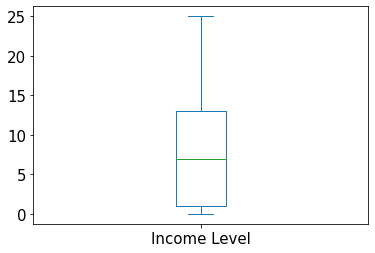

In [193]:
plt.figure() 
df['Income Level'].plot(kind='box', fontsize=15)
plt.show()

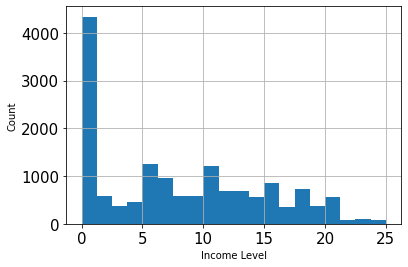

In [194]:
plt.figure()
df['Income Level'].plot(kind='hist',grid=True, bins=20, fontsize=15) 
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.show()

### Group genders

In [195]:
other_list = ['Prefer not to say', 'Prefer to self-describe', 'Nonbinary']
for i in df.index:
    if df['Gender'][i] in other_list:
        df['Gender'][i] = 'Other'
df

,Gender,Country,Years Coding,Years Using ML,Income,Income Level,High Income
0,Man,India,5-10 years,5-10 years,"25,000-29,999",10.0,0
1,Man,Indonesia,20+ years,Under 1 year,"60,000-69,999",14.0,0
2,Man,Pakistan,1-3 years,I do not use machine learning methods,$0-999,0.0,0
3,Man,Mexico,20+ years,5-10 years,"30,000-39,999",11.0,0
4,Man,India,< 1 years,10-20 years,"30,000-39,999",11.0,0
...,...,...,...,...,...,...,...
15386,Man,India,1-3 years,1-2 years,"3,000-3,999",3.0,0
15387,Man,South Korea,5-10 years,3-4 years,"80,000-89,999",16.0,1
15388,Man,Egypt,1-3 years,1-2 years,"15,000-19,999",8.0,0
15389,Man,Sweden,I have never written code,I do not use machine learning methods,$0-999,0.0,0


### Plot genders

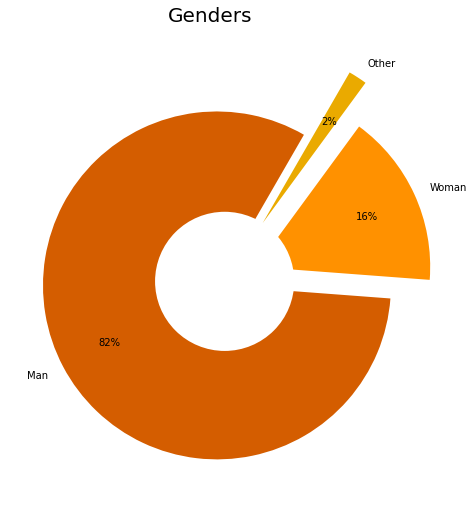

In [196]:
title = 'Genders'
fig, ax  = plt.subplots(figsize=(16, 8))
fig.suptitle(title, fontsize = 20)
explode = (0.05, 0.2, 0.4)
labels = list(df.iloc[1:].Gender.value_counts().index)
sizes = df.iloc[1:].Gender.value_counts().values
ax.pie(sizes, explode=explode,startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.7, colors=["#d45d00","#ff9100","#eaaa00"])
ax.add_artist(plt.Circle((0,0),0.4,fc='white'))
plt.show()

### Country Chloropleth map

In [197]:
countries = df['Country'].value_counts()
fig = go.Figure(data=go.Choropleth(
    locations = countries.index, 
    z = countries,
    locationmode = 'country names',
    colorbar_title = "Respondants"
))

fig.update_layout(
    title_text = 'Survey Respondants by Country'
)

fig.show()

### Top countries

In [198]:
def select_countries(x):
    if x in top_countries.index: x = x 
    else: x = "Other"
    return x
   
top_countries = df['Country'].value_counts().head(8)
df['Top Country'] = df['Country'].apply(lambda x: select_countries(x))
df

,Gender,Country,Years Coding,Years Using ML,Income,Income Level,High Income,Top Country
0,Man,India,5-10 years,5-10 years,"25,000-29,999",10.0,0,India
1,Man,Indonesia,20+ years,Under 1 year,"60,000-69,999",14.0,0,Other
2,Man,Pakistan,1-3 years,I do not use machine learning methods,$0-999,0.0,0,Other
3,Man,Mexico,20+ years,5-10 years,"30,000-39,999",11.0,0,Other
4,Man,India,< 1 years,10-20 years,"30,000-39,999",11.0,0,India
...,...,...,...,...,...,...,...,...
15386,Man,India,1-3 years,1-2 years,"3,000-3,999",3.0,0,India
15387,Man,South Korea,5-10 years,3-4 years,"80,000-89,999",16.0,1,Other
15388,Man,Egypt,1-3 years,1-2 years,"15,000-19,999",8.0,0,Other
15389,Man,Sweden,I have never written code,I do not use machine learning methods,$0-999,0.0,0,Other


### Plot top countries vs income

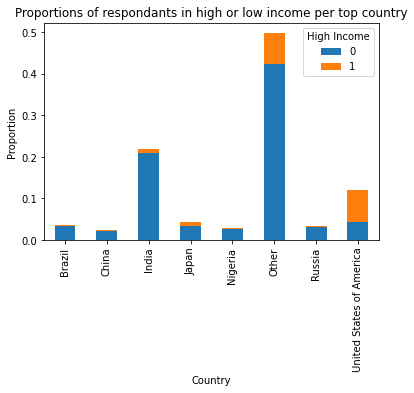

In [199]:
crosstab = pd.crosstab(df["Top Country"], df['High Income'], normalize=True)
crosstab.plot(kind = 'bar', stacked = 'true', title = 'Proportions of respondants in high or low income per top country')
plt.xlabel('Country')
plt.ylabel('Proportion')
plt.show() 

### Encode years coding & years using ML

In [200]:
years_coding_order = [['I have never written code',
                        '< 1 years',
                        '1-3 years',
                        '3-5 years',
                        '5-10 years',
                        '10-20 years',
                        '20+ years']] 
encoder = OrdinalEncoder(categories = years_coding_order)
df['Years Coding Level'] = encoder.fit_transform(df['Years Coding'].values.reshape(-1, 1))

years_using_ML_order = [['I do not use machine learning methods',
                        'Under 1 year',
                        '1-2 years',
                        '2-3 years',
                        '3-4 years',
                        '4-5 years',
                        '5-10 years',
                        '10-20 years',
                        '20 or more years']] 
encoder = OrdinalEncoder(categories = years_using_ML_order)
df['Years Using ML Level'] = encoder.fit_transform(df['Years Using ML'].values.reshape(-1, 1))
df

,Gender,Country,Years Coding,Years Using ML,Income,Income Level,High Income,Top Country,Years Coding Level,Years Using ML Level
0,Man,India,5-10 years,5-10 years,"25,000-29,999",10.0,0,India,4.0,6.0
1,Man,Indonesia,20+ years,Under 1 year,"60,000-69,999",14.0,0,Other,6.0,1.0
2,Man,Pakistan,1-3 years,I do not use machine learning methods,$0-999,0.0,0,Other,2.0,0.0
3,Man,Mexico,20+ years,5-10 years,"30,000-39,999",11.0,0,Other,6.0,6.0
4,Man,India,< 1 years,10-20 years,"30,000-39,999",11.0,0,India,1.0,7.0
...,...,...,...,...,...,...,...,...,...,...
15386,Man,India,1-3 years,1-2 years,"3,000-3,999",3.0,0,India,2.0,2.0
15387,Man,South Korea,5-10 years,3-4 years,"80,000-89,999",16.0,1,Other,4.0,4.0
15388,Man,Egypt,1-3 years,1-2 years,"15,000-19,999",8.0,0,Other,2.0,2.0
15389,Man,Sweden,I have never written code,I do not use machine learning methods,$0-999,0.0,0,Other,0.0,0.0


In [201]:
# # Make temp df
# df_temp = pd.DataFrame(columns=['Gender', 'Income'])
# df_temp['Gender'] = df['Gender']
# df_temp['Income'] = df['Income Level']

# # Get mean income for each top 8 countries
# gender_dict = {
#     'Male' : [0, 0, 0],
#     'Female' : [0, 0, 0],
#     'Other' : [0, 0, 0]
# }
# for gender in gender_dict:
#     for i in df.index:
#         if df_temp['Gender'][i] == gender:
#             gender_dict[gender][0] += df_temp['Income'][i]
#             gender_dict[gender][1] += 1
#     gender_dict[gender][2] = gender_dict[gender][0] / gender_dict[gender][1]

# # Put dict into data frame
# ret = pd.DataFrame.from_dict(gender_dict)
# ret = ret.iloc[2:, :]
# ret = ret.T
# ret.columns = ['Mean Income Level']

# # Plot dataframe into bar chart
# ax = ret.plot.barh(title='Mean Income Level by Gender')
# ax.set_ylabel('Gender')

### Get mean income level per country

Text(0, 0.5, 'Country')

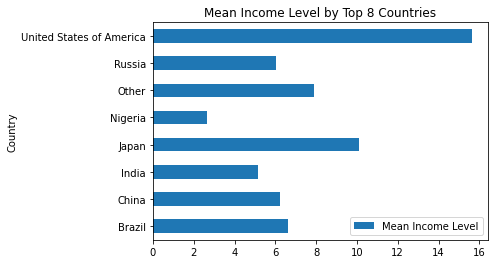

In [202]:
# Make temp df
df_temp = pd.DataFrame(columns=['Country', 'Income'])
df_temp['Country'] = df['Top Country']
df_temp['Income'] = df['Income Level']

# Get mean income for each top 8 countries
country_dict = {
    'Brazil' : [0, 0, 0],
    'China' : [0, 0, 0],
    'India' : [0, 0, 0],
    'Japan' : [0, 0, 0],
    'Nigeria' : [0, 0, 0],
    'Other' : [0, 0, 0],
    'Russia' : [0, 0, 0],
    'United States of America' : [0, 0, 0]
}
for country in country_dict:
    for i in df.index:
        if df_temp['Country'][i] == country:
            country_dict[country][0] += df_temp['Income'][i]
            country_dict[country][1] += 1
    country_dict[country][2] = country_dict[country][0] / country_dict[country][1]

# Put dict into data frame
ret = pd.DataFrame.from_dict(country_dict)
ret = ret.iloc[2:, :]
ret = ret.T
ret.columns = ['Mean Income Level']

# Plot dataframe into bar chart
ax = ret.plot.barh(title='Mean Income Level by Top 8 Countries')
ax.set_ylabel('Country')

### Get mean income level per years coding

Text(0, 0.5, 'Years Spent Coding')

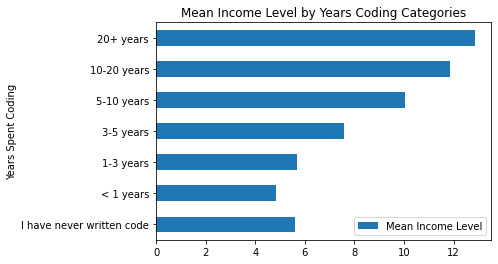

In [203]:
# Make temp df
df_temp = pd.DataFrame(columns=['Years Coding', 'Income'])
df_temp['Years Coding'] = df['Years Coding']
df_temp['Income'] = df['Income Level']

# Get mean income for each top 8 countries
coding_dict = {
    'I have never written code' : [0, 0, 0],
    '< 1 years' : [0, 0, 0],
    '1-3 years' : [0, 0, 0],
    '3-5 years' : [0, 0, 0],
    '5-10 years' : [0, 0, 0],
    '10-20 years' : [0, 0, 0],
    '20+ years' : [0, 0, 0]
}
for level in coding_dict:
    for i in df.index:
        if df_temp['Years Coding'][i] == level:
            coding_dict[level][0] += df_temp['Income'][i]
            coding_dict[level][1] += 1
    coding_dict[level][2] = coding_dict[level][0] / coding_dict[level][1]

# Put dict into data frame
ret = pd.DataFrame.from_dict(coding_dict)
ret = ret.iloc[2:, :]
ret = ret.T
ret.columns = ['Mean Income Level']

# Plot dataframe into bar chart
ax = ret.plot.barh(title='Mean Income Level by Years Coding Categories')
ax.set_ylabel('Years Spent Coding')

### Get mean income level per years using ML

Text(0, 0.5, 'Years Using ML')

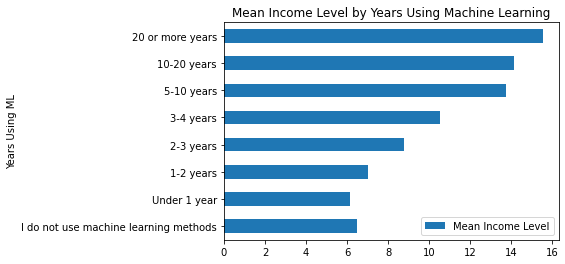

In [204]:
# Make temp df
df_temp = pd.DataFrame(columns=['Years Using ML', 'Income'])
df_temp['Years Using ML'] = df['Years Using ML']
df_temp['Income'] = df['Income Level']

# Get mean income for each top 8 countries
years_ML_dict = {
    'I do not use machine learning methods' : [0, 0, 0],
    'Under 1 year' : [0, 0, 0],
    '1-2 years' : [0, 0, 0],
    '2-3 years' : [0, 0, 0],
    '3-4 years' : [0, 0, 0],
    '5-10 years' : [0, 0, 0],
    '10-20 years' : [0, 0, 0],
    '20 or more years' : [0, 0, 0]
}
for years in years_ML_dict:
    for i in df.index:
        if df_temp['Years Using ML'][i] == years:
            years_ML_dict[years][0] += df_temp['Income'][i]
            years_ML_dict[years][1] += 1
    years_ML_dict[years][2] = years_ML_dict[years][0] / years_ML_dict[years][1]

# Put dict into data frame
ret = pd.DataFrame.from_dict(years_ML_dict)
ret = ret.iloc[2:, :]
ret = ret.T
ret.columns = ['Mean Income Level']

# Plot dataframe into bar chart
ax = ret.plot.barh(title='Mean Income Level by Years Using Machine Learning')
ax.set_ylabel('Years Using ML')

# Clustering

In [205]:
def cluster(isLow, column, clusters, title, xlabel):
    def get_groups(column):
        grouped = df[[column,'High Income']].groupby('High Income')
        low = pd.DataFrame(grouped.get_group(0), columns = [column,'High Income'])
        high = pd.DataFrame(grouped.get_group(1), columns = [column,'High Income'])
        return low, high
    
    low, high = get_groups(column)
    line = low if isLow else high
    
    X_line = pd.get_dummies(line)  
    km = KMeans(n_clusters = clusters)  
    y_line = km.fit_predict(X_line)
    line['Cluster'] = y_line

    churn_crosstab = pd.crosstab(line['Cluster'], line[column], normalize=True)
    churn_crosstab.plot(kind = 'bar', title = title)
    plt.xlabel(xlabel)
    plt.ylabel('Proportion Of Respondants')
    plt.legend(bbox_to_anchor=(1.0, 0.5))
    plt.show()

### By country

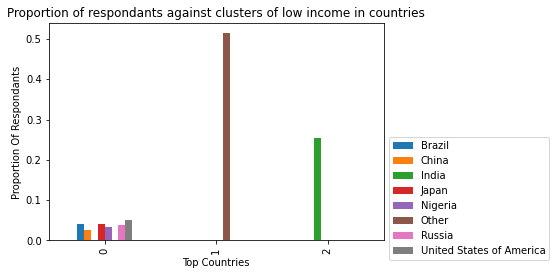

In [206]:
cluster(True, 'Top Country', 3, 'Proportion of respondants against clusters of low income in countries', 'Top Countries')

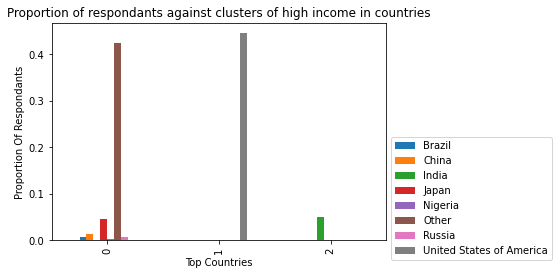

In [207]:
cluster(False, 'Top Country', 3, 'Proportion of respondants against clusters of high income in countries', 'Top Countries')

### By years coding

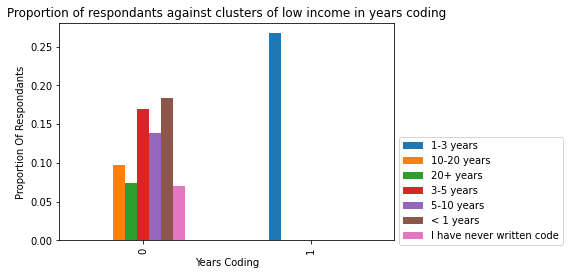

In [208]:
cluster(True, 'Years Coding', 2, 'Proportion of respondants against clusters of low income in years coding', 'Years Coding')

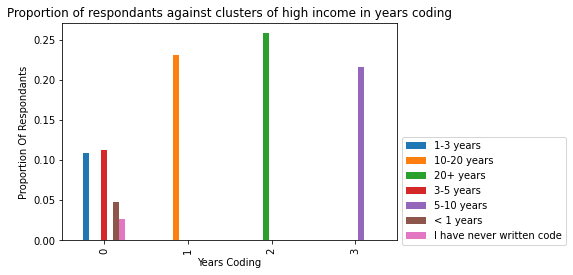

In [209]:
cluster(False, 'Years Coding', 4, 'Proportion of respondants against clusters of high income in years coding', 'Years Coding')

### By years using ML

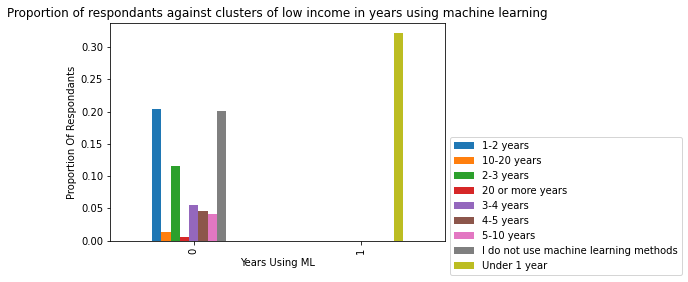

In [210]:
cluster(True, 'Years Using ML', 2, 'Proportion of respondants against clusters of low income in years using machine learning', 'Years Using ML')

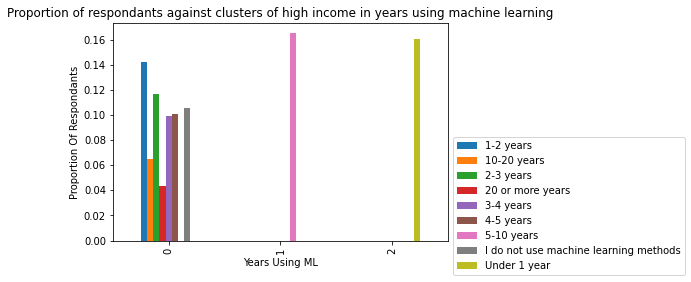

In [211]:
cluster(False, 'Years Using ML', 3, 'Proportion of respondants against clusters of high income in years using machine learning', 'Years Using ML')

# Machine learning

In [212]:
def normalisation(X_train, X_test):
    scaler = MinMaxScaler() 
    scaler.fit(X_train)
    X_train = scaler.transform(X_train) 
    X_test = scaler.transform(X_test)
    return X_train, X_test

### Rest of encoding

In [213]:
def encode_data(field):
    global df
    encoder = OneHotEncoder()
    X_fields = encoder.fit_transform(df[field].values.reshape(-1, 1)).toarray()
    df_Encode = pd.DataFrame(X_fields)
    df_Encode.columns = encoder.get_feature_names([field])
    df.drop(field, inplace=True, axis=1)
    df = pd.concat([df, df_Encode], axis=1).reindex(df.index)
encode_data('Gender')
encode_data('Country')

In [308]:
X = df
X = X.drop(columns = ['High Income', 'Years Coding', 'Years Using ML', 'Income Level', 'Top Country', 'Income'])
y = df.iloc[:, 4]
X

,Years Coding Level,Years Using ML Level,Gender_Man,Gender_Other,Gender_Woman,Country_Algeria,Country_Argentina,Country_Australia,Country_Austria,Country_Bangladesh,...,Country_Taiwan,Country_Thailand,Country_Tunisia,Country_Turkey,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom of Great Britain and Northern Ireland,Country_United States of America,Country_Viet Nam
0,4.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15386,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15387,4.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15388,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15389,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Before hyper-tuning

### KNN

In [295]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state = 4)
X_train, X_test = normalisation(X_train, X_test)

k_list, scores_list = [], []

# for k in range(1, 26):
#     knn = KNeighborsClassifier(n_neighbors = k, weights = "distance", metric = "euclidean")
#     knn.fit(X_train, y_train)
#     y_pred = knn.predict(X_test)
#     k_list.append(k)
#     accuracy = metrics.accuracy_score(y_test, y_pred)
#     scores_list.append(metrics.accuracy_score(y_test, y_pred))

knn = KNeighborsClassifier(n_neighbors = 16, weights = "distance", metric = "euclidean")
knn.fit(X_train, y_train)
knn_clf = knn.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, knn_clf))
classification_report(y_test, knn_clf, digits=5)

# plt.plot(k_list, scores_list)
# plt.xlabel('k')
# plt.ylabel('accuracy')
# plt.show()

Accuracy: 0.8778692074491121


'              precision    recall  f1-score   support\n\n           0    0.90731   0.95029   0.92830      3842\n           1    0.67845   0.51933   0.58832       776\n\n    accuracy                        0.87787      4618\n   macro avg    0.79288   0.73481   0.75831      4618\nweighted avg    0.86885   0.87787   0.87117      4618\n'

### Decision Tree

In [296]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state = 1)

def param_tunes(_criterion, _splitter, isSplitting):
    if isSplitting: clf = DecisionTreeClassifier(criterion = _criterion, splitter = _splitter)
    else: clf = DecisionTreeClassifier(criterion = _criterion)
    clf = clf.fit(X_train, y_train)
    clf.get_params()
    y_pred = clf.predict(X_test)
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    
# param_tunes('gini', '', False)
# param_tunes('entropy', '', False)
# param_tunes('gini', 'random', True)
# param_tunes('entropy', 'random', True)
# param_tunes('gini', 'best', True)
# param_tunes('entropy', 'best', True)

clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.get_params()
dtc_clf = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, dtc_clf))
classification_report(y_test, dtc_clf, digits=5)

# fig = plt.figure(figsize=(27,27)) 
# _ = tree.plot_tree(clf, feature_names=df.columns, class_names=['Bad','Good'],filled=True)

Accuracy: 0.866608921611087


'              precision    recall  f1-score   support\n\n           0    0.89797   0.94525   0.92101      3799\n           1    0.66397   0.50183   0.57163       819\n\n    accuracy                        0.86661      4618\n   macro avg    0.78097   0.72354   0.74632      4618\nweighted avg    0.85647   0.86661   0.85904      4618\n'

### Logistic Regression

In [297]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state = 4)
X_train, X_test = normalisation(X_train, X_test)

def param_lr_tunes(_max_iter, _pentalty, _solver):
    clf = LogisticRegression(max_iter = _max_iter, penalty = _pentalty, solver = _solver)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    
# param_lr_tunes(1000, 'l1', 'liblinear')
# param_lr_tunes(2000, 'l1', 'liblinear')
# param_lr_tunes(1000, 'l2', 'liblinear')
# param_lr_tunes(2000, 'l2', 'liblinear')
# param_lr_tunes(1000, 'l1', 'saga')
# param_lr_tunes(2000, 'l1', 'saga')
# param_lr_tunes(1000, 'l2', 'saga')
# param_lr_tunes(2000, 'l2', 'saga')

clf = LogisticRegression()
clf = clf.fit(X_train, y_train)
lr_clf = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, lr_clf))
classification_report(y_test, lr_clf, digits=5)

Accuracy: 0.8876136855781723


'              precision    recall  f1-score   support\n\n           0    0.91116   0.95836   0.93416      3842\n           1    0.72270   0.53737   0.61641       776\n\n    accuracy                        0.88761      4618\n   macro avg    0.81693   0.74786   0.77529      4618\nweighted avg    0.87949   0.88761   0.88077      4618\n'

### ANN

In [290]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state = 4)
clf = MLPClassifier()
clf = clf.fit(X_train, y_train)
ann_clf = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, ann_clf))
classification_report(y_test, ann_clf, digits=5)

Accuracy: 0.8826331745344305


'              precision    recall  f1-score   support\n\n           0    0.90541   0.95914   0.93150      3842\n           1    0.71350   0.50387   0.59063       776\n\n    accuracy                        0.88263      4618\n   macro avg    0.80945   0.73150   0.76107      4618\nweighted avg    0.87316   0.88263   0.87422      4618\n'

### SVM

In [291]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state = 4)
clf = SVC()
clf = clf.fit(X_train, y_train)
svc_clf = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, svc_clf))
classification_report(y_test, svc_clf, digits=5)

Accuracy: 0.8850151580770896


'              precision    recall  f1-score   support\n\n           0    0.90017   0.96929   0.93345      3842\n           1    0.75468   0.46778   0.57757       776\n\n    accuracy                        0.88502      4618\n   macro avg    0.82742   0.71854   0.75551      4618\nweighted avg    0.87572   0.88502   0.87365      4618\n'

### Random Forest

In [298]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state = 1)
clf = RandomForestClassifier()
clf = clf.fit(X_train, y_train)
rf_clf = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, rf_clf))
classification_report(y_test, rf_clf, digits=5)

Accuracy: 0.8685578172368991


'              precision    recall  f1-score   support\n\n           0    0.90101   0.94393   0.92197      3799\n           1    0.66614   0.51893   0.58339       819\n\n    accuracy                        0.86856      4618\n   macro avg    0.78357   0.73143   0.75268      4618\nweighted avg    0.85935   0.86856   0.86192      4618\n'

## After hyper-tuning

In [309]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)
def pipeline_accuracy(classifier):
    if classifier == 'dtc':
        pipe = Pipeline([('scaler', MinMaxScaler()), ('clf', DecisionTreeClassifier(random_state = 0))])
        # param_grid = [{'clf__criterion': ['gini', 'entropy'], 'clf__splitter': ['best', 'random'], 'clf__max_depth': list(range(1, 20))}]
        param_grid = [{'clf__criterion': ['entropy'], 'clf__splitter': ['best'], 'clf__max_depth': [7]}]
    elif classifier == 'knn':
        pipe = Pipeline([('clf', KNeighborsClassifier())])
        # param_grid = [{'clf__n_neighbors': list(range(1, 26)), 'clf__weights': ['uniform', 'distance']}]
        param_grid = [{'clf__n_neighbors': [16], 'clf__weights': ['uniform']}]
    elif classifier == 'lr':
        pipe = Pipeline([('scaler', MinMaxScaler()), ('clf', LogisticRegression(random_state = 0))])
        # param_grid = [{'clf__max_iter': [1000, 2000], 'clf__penalty': ['l1', 'l2'], 'clf__solver': ['liblinear', 'saga']}]
        param_grid = [{'clf__max_iter': [1000], 'clf__penalty': ['l1'], 'clf__solver': ['liblinear']}]
    elif classifier == 'ann':
        pipe = Pipeline([('scaler', StandardScaler()), ('clf', MLPClassifier(random_state = 1))])
        # param_grid = [{'clf__max_iter': [1000, 2000], 'clf__hidden_layer_sizes': [(3), (3, 2), (4)], 'clf__activation': ['tanh', 'relu', 'logistic'],
        #                'clf__solver': ['sgd', 'adam'], 'clf__alpha': [0.0001, 0.05], 'clf__learning_rate': ['constant', 'adapted', 'invscaling']}]
        param_grid = [{'clf__max_iter': [1000], 'clf__hidden_layer_sizes': [(4)], 'clf__activation': ['tanh'],
                       'clf__solver': ['adam'], 'clf__alpha': [0.05], 'clf__learning_rate': ['constant']}]
    elif classifier == 'rf':
        pipe = Pipeline([('clf', RandomForestClassifier(random_state = 1))])
        # param_grid = [{'clf__n_estimators': [5, 10], 'clf__criterion': ['gini', 'entropy'], 'clf__max_depth': list(range(1, 20)), 'clf__min_samples_leaf': list(range(1, 10)),
        #                'clf__min_samples_split': list(range(1, 10)), 'clf__bootstrap': [True, False]}]
        param_grid = [{'clf__n_estimators': [5], 'clf__criterion': ['entropy'], 'clf__max_depth': [19], 'clf__min_samples_leaf': [3],
                        'clf__min_samples_split': [9], 'clf__bootstrap': [False]}]
    elif classifier == 'svm':
        pipe = Pipeline([('scaler', StandardScaler()), ('clf', SVC())])
        # param_grid = [{'clf__C': [0.5, 5, 10, 20], 'clf__gamma': ['scale', 'auto']}]
        param_grid = [{'clf__C': [10], 'clf__gamma': ['scale']}]

    gs = GridSearchCV(pipe, param_grid = param_grid)
    gs.fit(X_train, y_train)
    print('Best parameters:', gs.best_params_)

    clf_best = gs.best_estimator_
    clf_best = clf_best.fit(X_train, y_train)
    y_pred = clf_best.predict(X_test)
    print('Test Accuracy: %.5f' % metrics.accuracy_score(y_test, y_pred))

    return clf_best, y_pred

In [310]:
dtc_clf_best, dtc_pred = pipeline_accuracy('dtc')
knn_clf_best, knn_pred = pipeline_accuracy('knn')
lr_clf_best, lr_pred = pipeline_accuracy('lr')
ann_clf_best, ann_pred = pipeline_accuracy('ann')
rf_clf_best, rf_pred = pipeline_accuracy('rf')
sm_clf_best, sm_pred = pipeline_accuracy('svm')

Best parameters: {'clf__criterion': 'entropy', 'clf__max_depth': 7, 'clf__splitter': 'best'}
Test Accuracy: 0.87787
Best parameters: {'clf__n_neighbors': 16, 'clf__weights': 'uniform'}
Test Accuracy: 0.87592
Best parameters: {'clf__max_iter': 1000, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Test Accuracy: 0.88653
Best parameters: {'clf__activation': 'tanh', 'clf__alpha': 0.05, 'clf__hidden_layer_sizes': 4, 'clf__learning_rate': 'constant', 'clf__max_iter': 1000, 'clf__solver': 'adam'}
Test Accuracy: 0.88328
Best parameters: {'clf__bootstrap': False, 'clf__criterion': 'entropy', 'clf__max_depth': 19, 'clf__min_samples_leaf': 3, 'clf__min_samples_split': 9, 'clf__n_estimators': 5}
Test Accuracy: 0.87679
Best parameters: {'clf__C': 10, 'clf__gamma': 'scale'}
Test Accuracy: 0.88177


In [285]:
def plot_roc_curves(clf_best):
    scores = clf_best.predict_proba(X_test)[:, 1]
    roc_auc = metrics.roc_auc_score(y_test, clf_best.predict_proba(X_test)[:, 1])
    print("AUC of ROC Curve:", roc_auc)
    roc_curve = plot_roc_curve(clf_best, X_test, y_test)
    plt.show()

In [301]:
def classification_reporting(clf_best):
    y_pred = clf_best.predict(X_test)
    print(classification_report(y_test, y_pred, digits=5))

In [323]:
def plot_confusion_matricies(clf_best, y_pred, _normalise, _cmap):
    # cf_matrix = confusion_matrix(y_test, y_pred)
    if _normalise == 'true':
        plot_confusion_matrix(clf_best, X_test, y_test, display_labels=['Low', 'High'], cmap=_cmap,
                              normalize=_normalise)
    else:
        plot_confusion_matrix(clf_best, X_test, y_test, display_labels=['Low', 'High'], cmap=_cmap)

              precision    recall  f1-score   support

           0    0.89642   0.96358   0.92879      3817
           1    0.73010   0.46941   0.57143       801

    accuracy                        0.87787      4618
   macro avg    0.81326   0.71650   0.75011      4618
weighted avg    0.86757   0.87787   0.86680      4618

AUC of ROC Curve: 0.8347214331574659


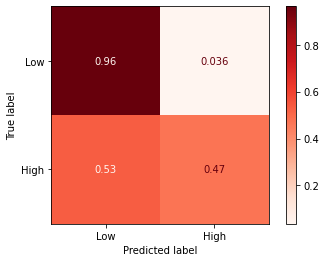

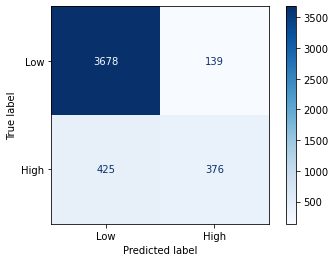

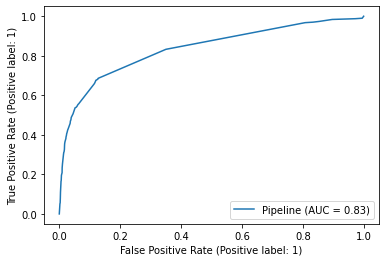

In [324]:
plot_confusion_matricies(dtc_clf_best, dtc_pred, 'true', plt.cm.Reds)
plot_confusion_matricies(dtc_clf_best, dtc_pred, '', plt.cm.Blues)
classification_reporting(dtc_clf_best)
plot_roc_curves(dtc_clf_best)

              precision    recall  f1-score   support

           0    0.90002   0.96446   0.93113      3799
           1    0.75320   0.50305   0.60322       819

    accuracy                        0.88263      4618
   macro avg    0.82661   0.73376   0.76718      4618
weighted avg    0.87399   0.88263   0.87298      4618

AUC of ROC Curve: 0.8885308485203194


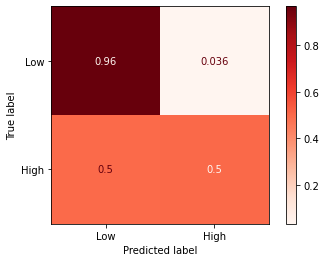

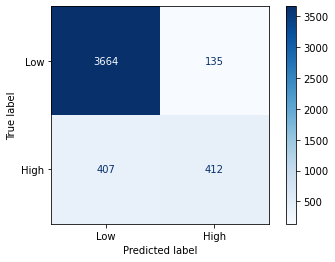

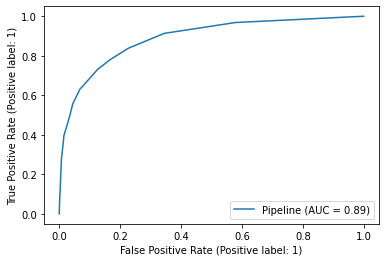

In [303]:
plot_confusion_matricies(knn_clf_best, 'true', plt.cm.Reds)
plot_confusion_matricies(knn_clf_best, '', plt.cm.Blues)
classification_reporting(knn_clf_best)
plot_roc_curves(knn_clf_best)

              precision    recall  f1-score   support

           0    0.90367   0.96052   0.93122      3799
           1    0.74138   0.52503   0.61472       819

    accuracy                        0.88328      4618
   macro avg    0.82252   0.74277   0.77297      4618
weighted avg    0.87488   0.88328   0.87509      4618

AUC of ROC Curve: 0.8910498264275574


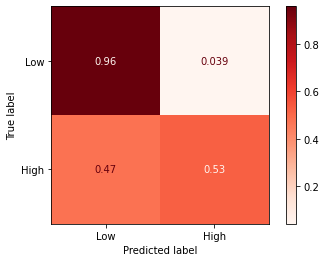

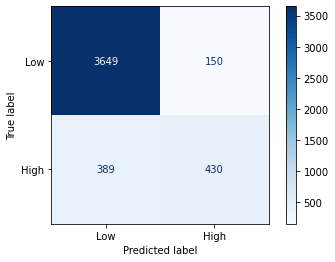

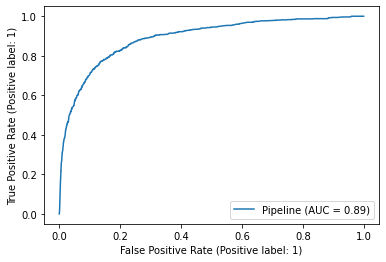

In [304]:
plot_confusion_matricies(lr_clf_best, 'true', plt.cm.Reds)
plot_confusion_matricies(lr_clf_best, '', plt.cm.Blues)
classification_reporting(lr_clf_best)
plot_roc_curves(lr_clf_best)

              precision    recall  f1-score   support

           0    0.90358   0.95709   0.92957      3799
           1    0.72559   0.52625   0.61005       819

    accuracy                        0.88068      4618
   macro avg    0.81458   0.74167   0.76981      4618
weighted avg    0.87201   0.88068   0.87290      4618

AUC of ROC Curve: 0.8982998224903989


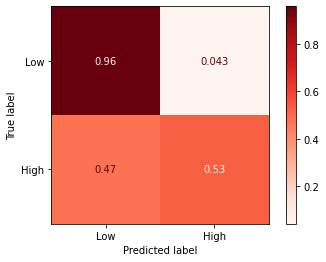

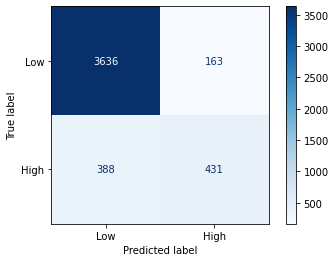

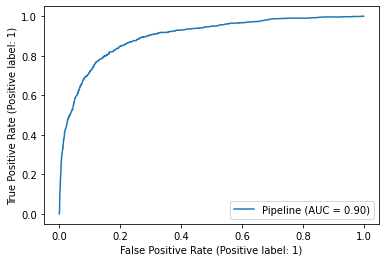

In [305]:
plot_confusion_matricies(ann_clf_best, 'true', plt.cm.Reds)
plot_confusion_matricies(ann_clf_best, '', plt.cm.Blues)
classification_reporting(ann_clf_best)
plot_roc_curves(ann_clf_best)

              precision    recall  f1-score   support

           0    0.88995   0.97710   0.93149      3799
           1    0.80537   0.43956   0.56872       819

    accuracy                        0.88177      4618
   macro avg    0.84766   0.70833   0.75011      4618
weighted avg    0.87495   0.88177   0.86716      4618

AUC of ROC Curve: 0.8989578904030076


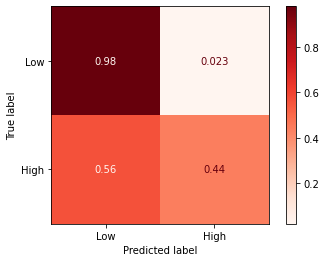

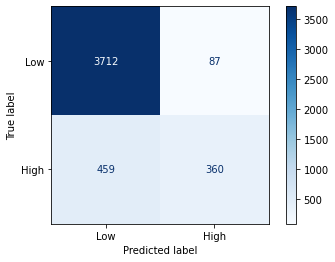

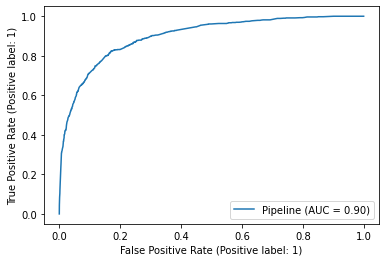

In [306]:
plot_confusion_matricies(rf_clf_best, 'true', plt.cm.Reds)
plot_confusion_matricies(rf_clf_best, '', plt.cm.Blues)
classification_reporting(rf_clf_best)
plot_roc_curves(rf_clf_best)

              precision    recall  f1-score   support

           0    0.90563   0.95736   0.93077      3799
           1    0.73090   0.53724   0.61928       819

    accuracy                        0.88285      4618
   macro avg    0.81826   0.74730   0.77503      4618
weighted avg    0.87464   0.88285   0.87553      4618



AttributeError: predict_proba is not available when  probability=False

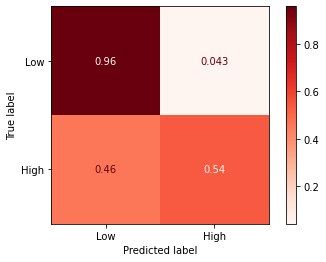

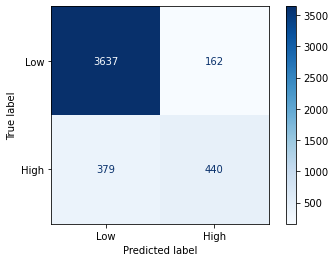

In [307]:
plot_confusion_matricies(sm_clf_best, 'true', plt.cm.Reds)
plot_confusion_matricies(sm_clf_best, '', plt.cm.Blues)
classification_reporting(sm_clf_best)
plot_roc_curves(sm_clf_best)

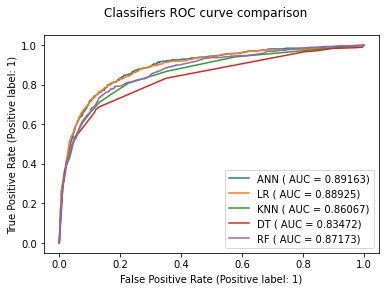

In [328]:
classifiers = [(ann_clf_best, "ANN"), (lr_clf_best, "LR"), (knn_clf_best, "KNN"),
               (dtc_clf_best, "DT"), (rf_clf_best, "RF")]
ax = plt.gca()
for i in classifiers:
    scores =  i[0].predict_proba(X_test)[:,1]
    roc_auc = metrics.roc_auc_score(y_test, scores)

    roc_curve = plot_roc_curve(i[0], X_test, y_test, ax=ax, label = i[1] + " ( AUC = " + str(roc_auc)[:7] +")")
roc_curve.figure_.suptitle("Classifiers ROC curve comparison")
plt.show()